In [1]:
# Packages / libraries
import os 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.
              format(column, 
        nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.
              format(column, nr_values))

The number of values for feature age :77
The number of values for feature job :12
The number of values for feature marital :3 -- ['divorced' 'married' 'single']
The number of values for feature education :4 -- ['primary' 'secondary' 'tertiary' 'unknown']
The number of values for feature default :2 -- ['no' 'yes']
The number of values for feature balance :7168
The number of values for feature housing :2 -- ['no' 'yes']
The number of values for feature loan :2 -- ['no' 'yes']
The number of values for feature contact :3 -- ['cellular' 'telephone' 'unknown']
The number of values for feature day :31
The number of values for feature month :12
The number of values for feature duration :1573
The number of values for feature campaign :48
The number of values for feature pdays :559
The number of values for feature previous :41
The number of values for feature poutcome :4 -- ['failure' 'other' 'success' 'unknown']
The number of values for feature y :2 -- ['no' 'yes']


In [5]:
# List of columns to convert to categorical
object_to_categorical = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'poutcome', 'y']

# Convert the specified object-type variables to categorical
df[object_to_categorical] = df[object_to_categorical].astype('category')


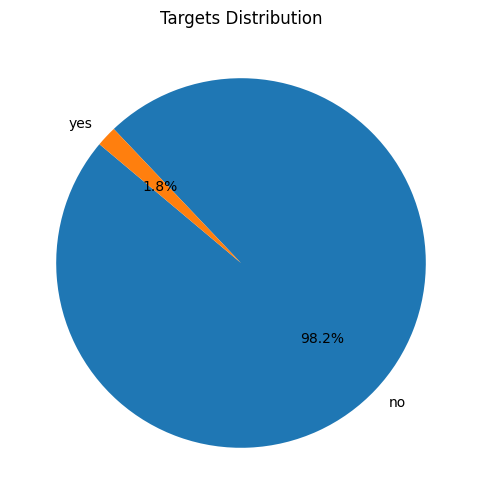

In [6]:
class_counts = df['default'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Targets Distribution')
plt.show()

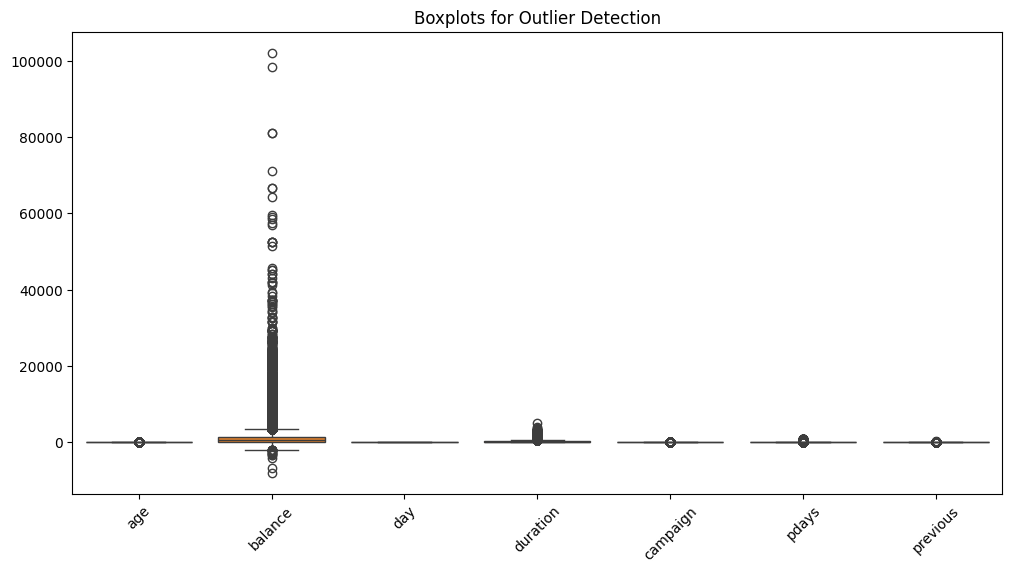

In [7]:
# Create a new DataFrame with the columns you want to analyze
selected_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
data_to_analyze = df[selected_columns]

# Create a boxplot for each variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_to_analyze)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [8]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['balance'] > lower_limit) & (df['balance'] < upper_limit)]


In [9]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['duration'] > lower_limit) & (df['duration'] < upper_limit)]

In [10]:
df.rename(columns={'y': 'subscribe'}, inplace=True)

In [11]:
df['default'] = df['default'].replace({'yes': 1, 'no': 0})

#Alternative Way = df['default'] = df['default'].cat.codes

In [12]:
variables_to_dummy = ['job','marital','subscribe','housing','loan','contact','month','poutcome','education']


df = pd.get_dummies(df, columns=variables_to_dummy, prefix=variables_to_dummy, prefix_sep='_', dtype='int', drop_first=True)

In [13]:
df.head()

,age,default,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,education_secondary,education_tertiary,education_unknown
0,58,0,2143,5,261,1,-1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,44,0,29,5,151,1,-1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,0,2,5,76,1,-1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
3,47,0,1506,5,92,1,-1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,0,1,5,198,1,-1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


# PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
X = df.drop('default', axis=1)
y = df['default']

### Scaliing

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = scaler.transform(X)

In [17]:
pca = PCA(n_components=3)
X = pca.fit_transform(X)

In [18]:
col = df.drop('default', axis=1)

In [19]:
col.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,education_secondary,education_tertiary,education_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


Text(0, 0.5, 'Second Principal Component')

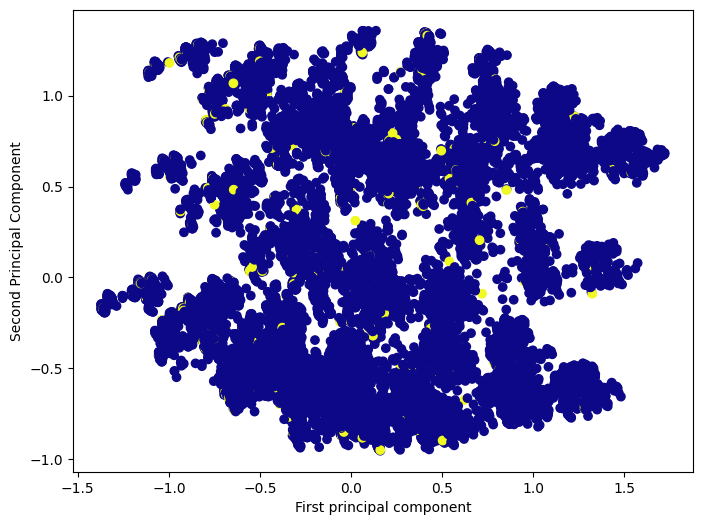

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=df['default'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

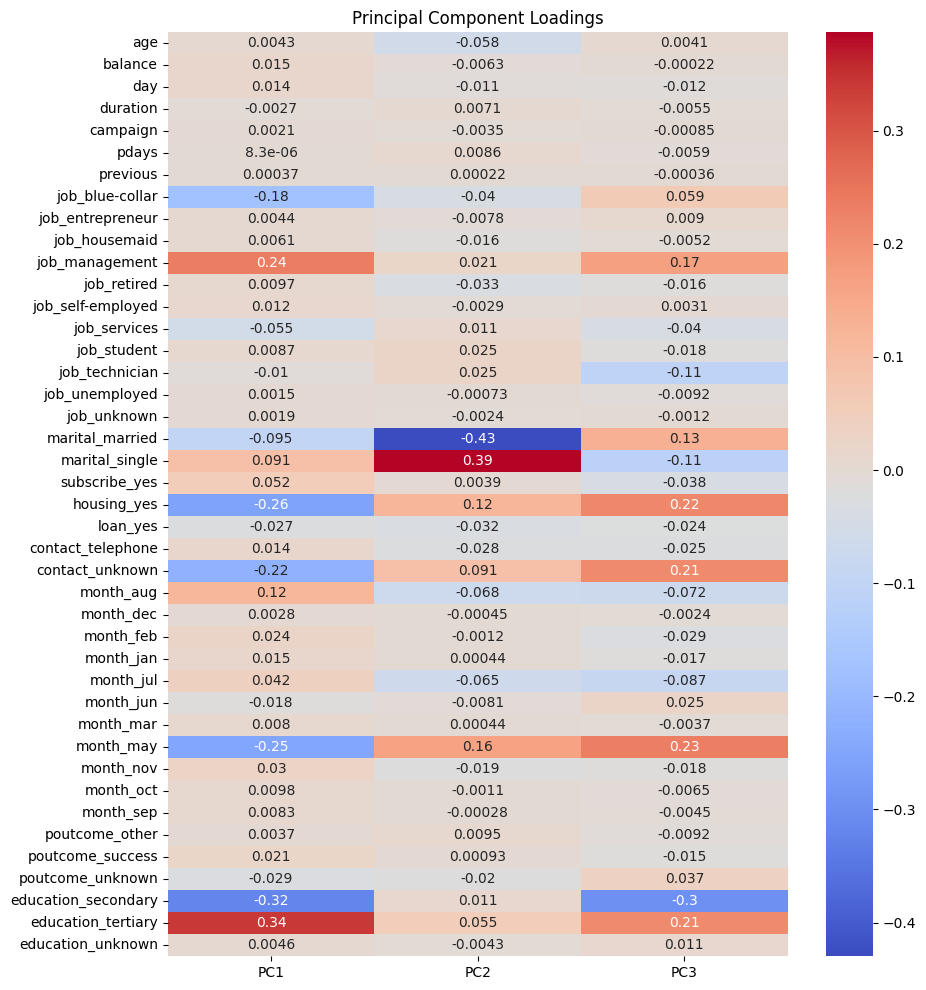

In [21]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=col.columns)


plt.figure(figsize=(10, 12))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Principal Component Loadings')
plt.show()


# Anomaly Detection

In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [23]:
accept = df[df['default']==1]

reject = df[df['default']==0]

outlier_fraction = len(accept)/float(len(reject))

print(accept.shape,reject.shape)

(750, 43) (36820, 43)


In [24]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
}

In [25]:
n_outliers = len(accept)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

Isolation Forest: 1474
Accuracy Score :
0.9607665690710674
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     36820
           1       0.03      0.03      0.03       750

    accuracy                           0.96     37570
   macro avg       0.50      0.50      0.50     37570
weighted avg       0.96      0.96      0.96     37570

Local Outlier Factor: 1482
Accuracy Score :
0.960553633217993
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     36820
           1       0.02      0.02      0.02       750

    accuracy                           0.96     37570
   macro avg       0.50      0.50      0.50     37570
weighted avg       0.96      0.96      0.96     37570

